In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [8]:
reeses = cv2.imread('DATA/reeses_puffs.png', 0)
cereals = cv2.imread('DATA/many_cereals.jpg', 0)

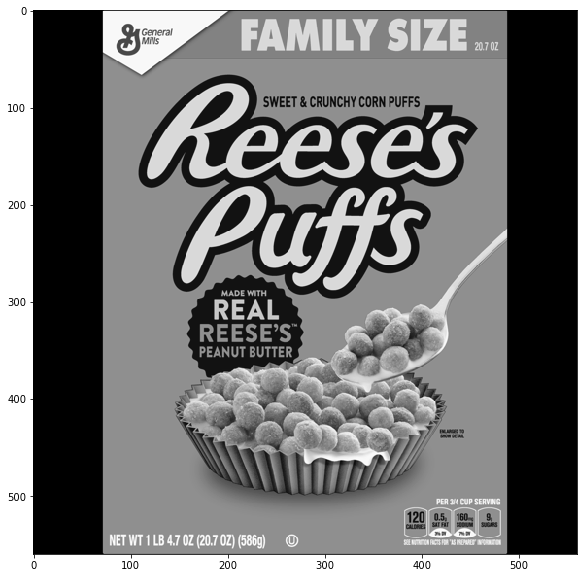

In [9]:
display(reeses, cmap='gray')

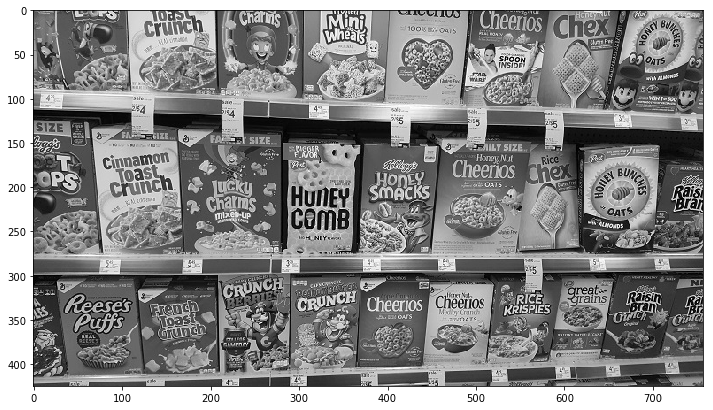

In [10]:
display(cereals, cmap='gray')

In [11]:
sift = cv2.xfeatures2d.SIFT_create()

In [12]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [13]:
# FLANN

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [ ]:
# flann method is faster than brut force methods but it doesn't find the best match 
# and we cannot play with it because it slows down the algorithm

In [14]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [15]:
matches = flann.knnMatch(des1, des2, k = 2)

In [16]:
matchesMask = [[0,0] for i in range(len(matches))]

### Now we will do a ratio test .If 1 and 2 value is pretty close then merge it otherwise remove it

In [27]:
# LESS DISTANCE == BETTER MATCH

# RATIO MATCH1 < 75% MATCH2
for i, (match1, match2) in enumerate(matches):
#     IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH2
#     THEN DESCRIPTOR WAS A GOOD MATCH LETS KEEP IT
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [24]:
draw_params = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matchesMask,
                  flags = 0)

In [25]:
# flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 2)
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

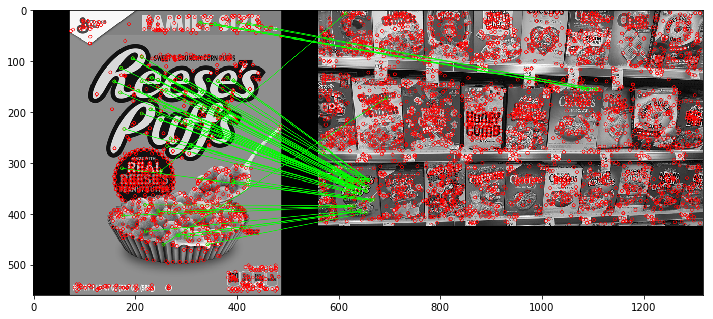

In [26]:
display(flann_matches)